In [1]:
# import
import torch
from torchvision import datasets, transforms
from multiclass_functions1 import * # all
import matplotlib.pyplot as plt
from torch import nn, optim
import torch.nn.functional as F
DEVICE = 'cuda'if torch.cuda.is_available() else 'cpu'
print(DEVICE)

cuda


In [2]:
# Hyper parameters
BATCH_SIZE = 32
LR = 1e-3
EPOCH = 2
criterion = nn.CrossEntropyLoss()
new_model_train = True
model_type = "MLP"
dataset = "MNIST"
save_model_path = f"../pytorch_1/{model_type}_{dataset}.pt"

In [3]:
# load dataset
transform = transforms.ToTensor()
download_root = './MNIST_DATASET'

train_DS = datasets.MNIST(download_root, transform=transform, train=True, download=True)
valid_DS = datasets.MNIST(download_root, transform=transform, train=False, download=True)
test_DS = datasets.MNIST(download_root, transform=transform, train=False, download=True)
train_DL = torch.utils.data.DataLoader(train_DS, batch_size=BATCH_SIZE, shuffle=True)
test_DL = torch.utils.data.DataLoader(test_DS, batch_size=BATCH_SIZE, shuffle=True)

In [4]:
# model 생성
from torch import nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear = nn.Sequential(nn.Linear(28*28, 100),
                                    nn.ReLU(),
                                    nn.Linear(100, 10))

    def forward(self, x):
        x = torch.flatten(x, start_dim=1) # (32, 784의 입력을 기대하기 때문에 flatten)
        x = self.linear(x)
        return x


In [5]:
# 잘 통과되는지 확인
model = MLP().to(DEVICE)
print(model)
x_batch, _ = next(iter(train_DL))
print(model(x_batch.to(DEVICE)).shape)

MLP(
  (linear): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)
torch.Size([32, 10])


Epoch: 1, train loss: 0.31
--------------------
Epoch: 2, train loss: 0.14
--------------------


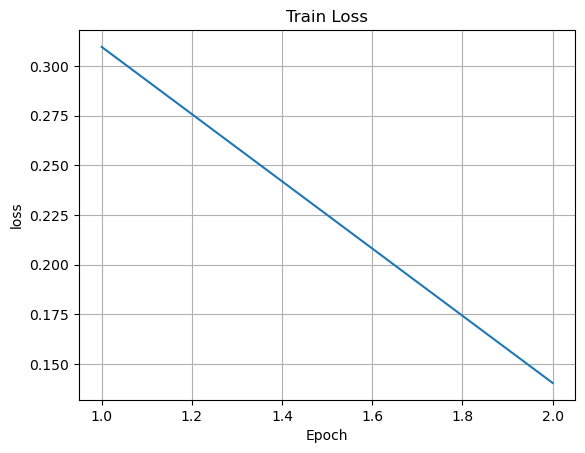

In [6]:
# 모델 학습
if new_model_train:
    optimizer = optim.Adam(model.parameters(), lr=LR)
    loss_history = Train(model, train_DL, criterion, optimizer, EPOCH)

    plt.plot(range(1, EPOCH+1), loss_history)
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.title('Train Loss')
    plt.grid()

In [7]:
torch.save(model.state_dict(), save_model_path)
load_model = MLP().to(DEVICE)
load_model.load_state_dict(torch.load(save_model_path, map_location=DEVICE))

<All keys matched successfully>

In [8]:
Test(load_model, test_DL)
# print(count_params(load_model))

Test accuracy: 9630/10000 (96.3 %)


In [10]:
def Test_plot(model, test_DL):
    model.eval()
    with torch.no_grad():
        x_batch, y_batch = next(iter(test_DL))
        x_batch = x_batch.to(DEVICE)
        print('y_batch : ', y_batch)
        y_hat = model(x_batch)
        pred = y_hat.argmax(dim=1)

    x_batch = x_batch.to('cpu')

    plt.figure(figsize=(8, 4))
    for idx in range(6):
        plt.subplot(2, 3, idx+1, xticks = [], yticks = [])
        plt.imshow(x_batch[idx].permute(1, 2, 0).squeeze(), cmap="gray")
        pred_class = test_DL.dataset.classes[pred[idx]]
        true_class = test_DL.dataset.classes[y_batch[idx]]
        plt.title(f"{pred_class} ({true_class})", color = 'g' if pred_class == true_class else 'r')

In [38]:
model.eval()

x_batch, y_batch = next(iter(test_DL))
x_batch = x_batch.to(DEVICE)
y_hat = model(x_batch)
pred = y_hat.argmax(dim=1)
pred

# x_batch = x_batch.to('cpu')
# plt.imshow(x_batch[0].permute(1, 2, 0).squeeze(), cmap="gray")
# pred_class = test_DL.dataset.classes[pred[0]]
# true_class = test_DL.dataset.classes[y_batch[0]]
# plt.title(f"{pred_class} ({true_class})", color = 'g' if pred_class == true_class else 'r')

tensor([9, 1, 7, 6, 8, 1, 1, 7, 9, 7, 1, 5, 6, 3, 2, 0, 0, 6, 3, 4, 6, 3, 3, 3,
        0, 2, 0, 3, 4, 7, 9, 0], device='cuda:0')

y_batch :  tensor([4, 4, 4, 9, 1, 0, 7, 4, 0, 8, 8, 2, 8, 9, 1, 8, 4, 2, 0, 7, 3, 7, 5, 9,
        1, 9, 7, 2, 9, 3, 1, 1])


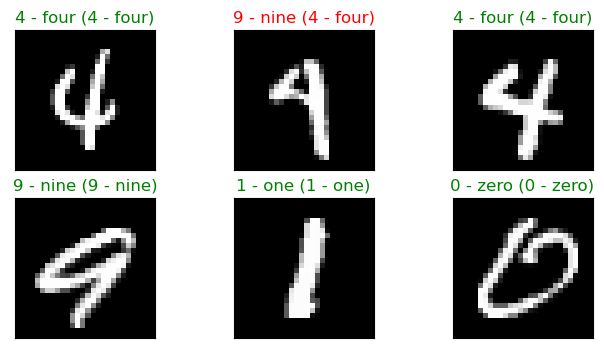

In [11]:
Test_plot(load_model, test_DL)